# Create a model
It learns from images and where the target is equal to input

Useless example to learn identity function $ f(\mathbf{x}) = \mathbf{x} $ but that allows me to implement:
- a model
- a custom loss
- a custom training set
- feedforward
 

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras as keras
from keras import layers, models

# Import custom training set

dataset shape is (256, 256, 1)
dataset size is 1000
800
train:	 (256, 256, 1) (256, 256, 1)
test:	 (256, 256, 1) (256, 256, 1)


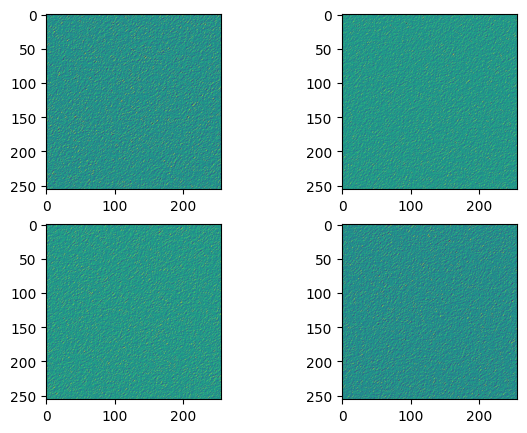

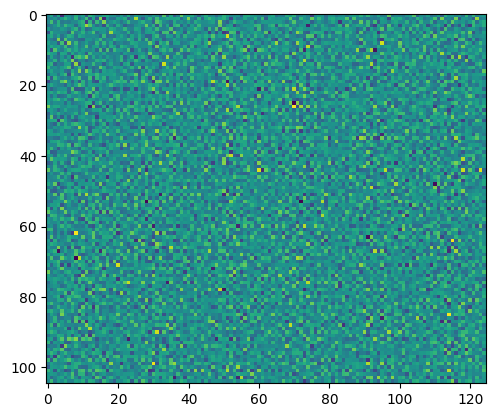

In [18]:
# Import the dataset 
import os
path = (os.path.join(os.getcwd(), "saved_data"))

new_dataset = tf.data.Dataset.load(path)

# Check dataset
ds1 = new_dataset.take(4)
plt.figure(figsize=(7,5))

i = 1
for (feature, label) in ds1:
    plt.subplot(2,2,i)
    plt.imshow(feature)
    i = i + 1
dataset_shape = feature.shape
print("dataset shape is", dataset_shape)

# size of the dataset
iterator = new_dataset.as_numpy_iterator()
dataset_size = sum(1 for _ in iterator)
print("dataset size is", dataset_size)

# Divide dataset in train/test
train_size = int(0.8 * dataset_size)
print(train_size)
train_ds = new_dataset.take(train_size)
test_ds = new_dataset.skip(train_size)

# Test 
for (feature, label) in train_ds.take(1):
    print("train:\t", feature.shape, label.shape)
for (feature, label) in test_ds.take(1):
    print("test:\t", feature.shape, label.shape)

# ---- Just to test, useless piece of code for everybody else ----# 
def preprocess(feature, label):
    feature = keras.layers.Resizing(105, 125)(feature)
    return (feature, label)

dataset2 = new_dataset.map(preprocess)
ds1 = dataset2.take(1)
plt.figure()
for (feature, label) in ds1:
    plt.imshow(feature)


# Custom LOSS and COMPILATION

In [16]:
# Definition of a custom Loss function in keras
@keras.saving.register_keras_serializable()
def custom_loss(y_true, y_pred):
    difference =  tf.math.squared_difference(y_true, y_pred)
    loss = tf.math.reduce_mean(difference) / 10
    return loss

In [17]:
# Define the model needed
def make_model(input_shape):
    inputs = keras.Input(shape=(input_shape))

    x = layers.Conv2D(1, 3, padding='same') (inputs)
    output = (x)

    return keras.Model(inputs, output)

# Summary of the model
model = make_model(input_shape=dataset_shape)
model.summary()

model.compile(optimizer='adam',
              loss=custom_loss,
              metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 1)    │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [15]:
model.fit(train_ds, validation_data=test_ds, epochs=2)

Epoch 1/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: -0.0200 - mean_absolute_error: 2.0203 - val_loss: -0.0800 - val_mean_absolute_error: 2.0811
Epoch 2/2
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: -0.1000 - mean_absolute_error: 2.1362 - val_loss: -0.1600 - val_mean_absolute_error: 2.3479


# Create a Saving point and a loading point in keras to save model!

In [10]:
path_model = "2_custom_model_example_data/SAVED_MODEL.keras"
model.save(path_model)

In [11]:
# Load back the model
path_model = "2_custom_model_example_data/SAVED_MODEL.keras"
model = keras.models.load_model(path_model)

# Test network in feedforward
Load image

(168, 300, 3)
(256, 256, 1)
tf.Tensor(
[[[[134.95914 ]]

  [[136.07924 ]]

  [[137.2162  ]]

  ...

  [[127.096825]]

  [[127.097145]]

  [[126.2134  ]]]


 [[[135.38876 ]]

  [[136.07918 ]]

  [[137.2162  ]]

  ...

  [[127.29876 ]]

  [[127.09711 ]]

  [[126.64302 ]]]


 [[[135.8461  ]]

  [[136.07912 ]]

  [[137.2162  ]]

  ...

  [[127.59155 ]]

  [[127.13224 ]]

  [[127.10036 ]]]


 ...


 [[[119.3505  ]]

  [[119.335464]]

  [[119.39408 ]]

  ...

  [[108.72181 ]]

  [[108.66321 ]]

  [[107.903725]]]


 [[[118.893166]]

  [[119.206535]]

  [[119.05012 ]]

  ...

  [[108.66319 ]]

  [[108.663216]]

  [[107.77899 ]]]


 [[[118.46355 ]]

  [[119.08542 ]]

  [[118.782074]]

  ...

  [[108.66319 ]]

  [[108.663216]]

  [[107.77899 ]]]], shape=(256, 256, 1, 1), dtype=float32)


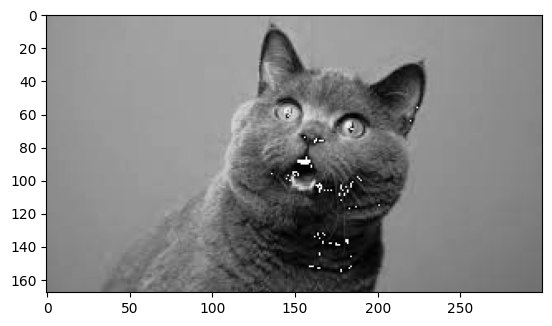

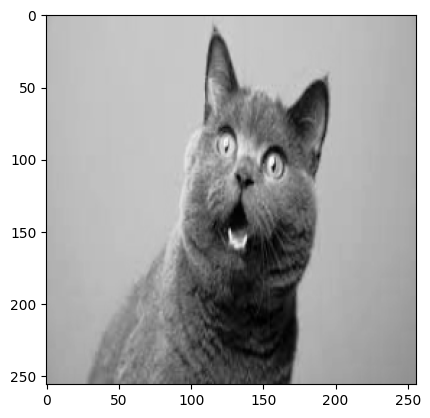

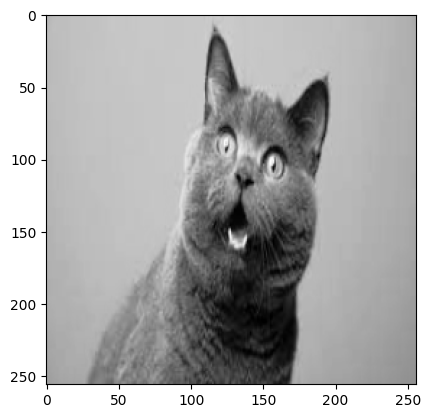

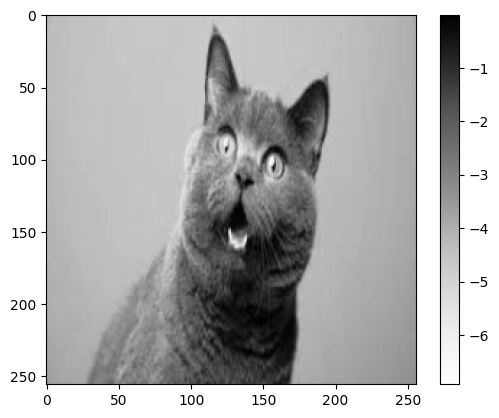

In [12]:
from PIL import Image

try:
    filename = "2_custom_model_example_data/image_FF.jpeg"
    pic = Image.open(filename)
except FileNotFoundError:
    print("There is no such file as:\n\t", filename)

pic_array = np.array(pic)
print(pic_array.shape)

plt.imshow(-pic_array[:,:,1], cmap="Greys")

# Resize with keras
pic_tensor = tf.constant(pic_array, dtype=tf.int16)
pic_tensor = tf.image.rgb_to_grayscale(pic_tensor)
pic_tensor = tf.image.resize(pic_tensor, (256,256))
print(pic_tensor.shape)
plt.figure()
plt.imshow(-pic_tensor[:,:,0], cmap="Greys")

# Feedforward on network
out = model(pic_tensor)
print(out)
out = tf.reshape(out, (256,256,1))
# Print output and error
plt.figure()
plt.imshow(-(out[:,:,:]), cmap="Greys")
plt.figure()
plt.imshow(-(pic_tensor - out[:,:,:]), cmap="Greys")
plt.colorbar()
